## v1.5:

### Importing Libraries

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 110)
import numpy as np
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, quantile_transform
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from category_encoders import BinaryEncoder
%matplotlib inline

### Processing train.csv Dataset

In [2]:
df = pd.read_csv("train_data.csv")

# Dropping first the empty column and then rows with NaNs
df = df.drop("c_rcs_estimate", axis=1)

# Filtering events with len=1 or min_tca > 2 or max_tca < 2
df = df.groupby('event_id').filter(lambda x : x["time_to_tca"].min()<2.0)
df = df.groupby('event_id').filter(lambda x : x["time_to_tca"].max()>2.0)

# OHE for c_object_type (5 categories) -> 5 new features
df = pd.get_dummies(df)

# Binary encoder for mission_id (19 categories) -> 5 new features
encoder = BinaryEncoder(cols=['mission_id'], drop_invariant=True)
df = encoder.fit_transform(df)

df

,event_id,time_to_tca,mission_id_1,mission_id_2,mission_id_3,mission_id_4,mission_id_5,risk,max_risk_estimate,max_risk_scaling,miss_distance,relative_speed,relative_position_r,relative_position_t,relative_position_n,relative_velocity_r,relative_velocity_t,relative_velocity_n,t_time_lastob_start,t_time_lastob_end,t_recommended_od_span,t_actual_od_span,t_obs_available,t_obs_used,t_residuals_accepted,t_weighted_rms,t_rcs_estimate,t_cd_area_over_mass,t_cr_area_over_mass,t_sedr,t_j2k_sma,t_j2k_ecc,t_j2k_inc,t_ct_r,t_cn_r,t_cn_t,t_crdot_r,t_crdot_t,t_crdot_n,t_ctdot_r,t_ctdot_t,t_ctdot_n,t_ctdot_rdot,t_cndot_r,t_cndot_t,t_cndot_n,t_cndot_rdot,t_cndot_tdot,c_time_lastob_start,c_time_lastob_end,c_recommended_od_span,c_actual_od_span,c_obs_available,c_obs_used,c_residuals_accepted,c_weighted_rms,c_cd_area_over_mass,c_cr_area_over_mass,c_sedr,c_j2k_sma,c_j2k_ecc,c_j2k_inc,c_ct_r,c_cn_r,c_cn_t,c_crdot_r,c_crdot_t,c_crdot_n,c_ctdot_r,c_ctdot_t,c_ctdot_n,c_ctdot_rdot,c_cndot_r,c_cndot_t,c_cndot_n,c_cndot_rdot,c_cndot_tdot,t_span,c_span,t_h_apo,t_h_per,c_h_apo,c_h_per,geocentric_latitude,azimuth,elevation,mahalanobis_distance,t_position_covariance_det,c_position_covariance_det,t_sigma_r,c_sigma_r,t_sigma_t,c_sigma_t,t_sigma_n,c_sigma_n,t_sigma_rdot,c_sigma_rdot,t_sigma_tdot,c_sigma_tdot,t_sigma_ndot,c_sigma_ndot,F10,F3M,SSN,AP,c_object_type_DEBRIS,c_object_type_PAYLOAD,c_object_type_ROCKET BODY,c_object_type_TBA,c_object_type_UNKNOWN
9,2,6.983474,0,0,0,0,1,-10.816161,-6.601713,13.293159,22902.0,14348.0,-1157.6,-6306.2,21986.3,15.8,-13792.0,-3957.1,1.0,0.0,3.92,3.92,444,442,99.4,1.094,3.4505,0.025520,0.009390,0.000019,7158.394530,0.000860,98.523094,-0.099768,0.357995,-0.122174,0.085472,-0.999674,0.121504,-0.999114,0.057809,-0.353866,-0.043471,-0.025138,0.087954,-0.430583,-0.088821,0.021409,180.0,2.0,13.87,13.87,15.0,15.0,100.0,1.838,0.814291,0.564380,0.000726,7168.396928,0.001367,69.717278,-0.068526,0.636970,-0.038214,0.064305,-0.999989,0.036762,-0.996314,0.153806,-0.634961,-0.149627,0.715984,-0.159057,0.953945,0.156803,-0.723349,12.0,2.0,786.417082,774.097978,800.056782,780.463075,63.955771,-16.008858,-0.063092,115.208802,4.110620e+06,2.715773e+18,9.039007,257.208281,147.615141,38173.433170,1.642649,218.243786,0.153332,39.695541,0.009370,0.269965,0.003886,0.339406,73.0,77.0,27.0,4.0,0,0,0,0,1
10,2,6.691611,0,0,0,0,1,-10.850473,-6.603452,13.374242,22966.0,14348.0,-1161.1,-6330.2,22046.3,15.8,-13792.0,-3957.1,1.0,0.0,3.86,3.86,444,442,99.4,1.099,3.4505,0.024168,0.010812,0.000017,7158.394561,0.000861,98.523097,-0.005874,0.360471,-0.036075,-0.002789,-0.999876,0.035870,-0.997255,-0.068114,-0.357012,0.076754,-0.027154,0.084268,-0.442266,-0.085037,0.020991,180.0,2.0,13.87,13.87,15.0,15.0,100.0,1.838,0.814291,0.564380,0.000726,7168.397641,0.001367,69.717278,-0.067750,0.636974,-0.038143,0.063521,-0.999989,0.036689,-0.996313,0.153053,-0.634998,-0.148865,0.715914,-0.158753,0.953971,0.156495,-0.723302,12.0,2.0,786.420510,774.094612,800.057080,780.464203,63.956674,-16.008858,-0.063092,101.429474,1.158624e+07,2.704770e+18,8.994890,257.185050,242.290796,38098.346421,1.675557,218.238631,0.252043,39.617319,0.009373,0.269926,0.003939,0.339393,73.0,77.0,27.0,4.0,0,0,0,0,1
11,2,6.269979,0,0,0,0,1,-30.000000,-6.217958,426.808532,18785.0,14347.0,-698.8,-5176.4,18044.8,14.4,-13791.4,-3957.2,1.0,0.0,3.85,3.85,447,445,99.4,1.113,3.4505,0.023038,0.009797,0.000016,7158.407962,0.000862,98.523100,-0.222621,0.425875,-0.149746,0.206756,-0.999517,0.147289,-0.999479,0.191052,-0.423717,-0.175085,0.082662,0.017007,-0.405439,-0.018617,-0.083820,1.0,0.0,14.63,14.63,15.0,15.0,100.0,1.641,0.849987,0.476139,0.000712,7168.395887,0.001297,69.718437,0.025977,0.563595,0.065183,-0.045196,-0.999602,-0.075887,-0.999774,-0.006036,-0.564147,0.025308,0.703561,-0.027022,0.916588,0.007301,-0.706289,12.0,2.0,786.439755,774.102169,799.554662,780.963112,63.903391,-16.009902,-0.057504,177.272242,3.780413e+06,7.644201e+13,9.927960,48.396653,121.934573,2521.604251,1.824402,86.921700,0.126831,2.616

### Which is the lenght of the sequences of high risk?

In [3]:
df_prueba = pd.DataFrame.copy(df)
df_prueba["event-lenght"] = df_prueba.groupby('event_id')['event_id'].transform('value_counts')
df_prueba = df_prueba.groupby(["event_id"]).apply(lambda x: x.iloc[-1])
df_prueba = df_prueba[df_prueba["risk"]>=-6]
df_prueba

,event_id,time_to_tca,mission_id_1,mission_id_2,mission_id_3,mission_id_4,mission_id_5,risk,max_risk_estimate,max_risk_scaling,miss_distance,relative_speed,relative_position_r,relative_position_t,relative_position_n,relative_velocity_r,relative_velocity_t,relative_velocity_n,t_time_lastob_start,t_time_lastob_end,t_recommended_od_span,t_actual_od_span,t_obs_available,t_obs_used,t_residuals_accepted,t_weighted_rms,t_rcs_estimate,t_cd_area_over_mass,t_cr_area_over_mass,t_sedr,t_j2k_sma,t_j2k_ecc,t_j2k_inc,t_ct_r,t_cn_r,t_cn_t,t_crdot_r,t_crdot_t,t_crdot_n,t_ctdot_r,t_ctdot_t,t_ctdot_n,t_ctdot_rdot,t_cndot_r,t_cndot_t,t_cndot_n,t_cndot_rdot,t_cndot_tdot,c_time_lastob_start,c_time_lastob_end,c_recommended_od_span,c_actual_od_span,c_obs_available,c_obs_used,c_residuals_accepted,c_weighted_rms,c_cd_area_over_mass,c_cr_area_over_mass,c_sedr,c_j2k_sma,c_j2k_ecc,c_j2k_inc,c_ct_r,c_cn_r,c_cn_t,c_crdot_r,c_crdot_t,c_crdot_n,c_ctdot_r,c_ctdot_t,c_ctdot_n,c_ctdot_rdot,c_cndot_r,c_cndot_t,c_cndot_n,c_cndot_rdot,c_cndot_tdot,t_span,c_span,t_h_apo,t_h_per,c_h_apo,c_h_per,geocentric_latitude,azimuth,elevation,mahalanobis_distance,t_position_covariance_det,c_position_covariance_det,t_sigma_r,c_sigma_r,t_sigma_t,c_sigma_t,t_sigma_n,c_sigma_n,t_sigma_rdot,c_sigma_rdot,t_sigma_tdot,c_sigma_tdot,t_sigma_ndot,c_sigma_ndot,F10,F3M,SSN,AP,c_object_type_DEBRIS,c_object_type_PAYLOAD,c_object_type_ROCKET BODY,c_object_type_TBA,c_object_type_UNKNOWN,event-lenght
event_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
168,168.0,0.167720,0.0,0.0,0.0,0.0,1.0,-5.019997,-5.014888,0.860278,3176.0,11029.0,-66.3,2149.5,-2337.5,78.8,-8116.4,-7467.5,1.0,0.0,3.56,3.56,510.0,508.0,98.9,1.031,3.4500,0.023972,0.015037,2.095400e-05,7157.025125,0.000715,98.620519,0.083989,0.125591,0.016693,-0.157717,-0.913714,0.045804,-0.999868,-0.098836,-0.124526,0.172464,0.051114,0.068591,-0.379399,-0.088191,-0.053355,180.0,2.0,17.81,17.81,21.0,21.0,98.8,2.236,0.862058,0.367120,0.000479,7227.737769,0.013893,71.046891,0.963400,0.131466,-0.056714,-0.962820,-0.999990,0.060564,-0.088206,0.181982,-0.703845,-0.184149,0.048145,-0.198561,0.842787,0.201401,-0.917805,12.00,2.00,784.007014,773.769236,950.018356,749.183182,69.632063,-42.615631,-0.409359,90.605206,1.925691e+02,1.693518e+15,2.002837,234.736512,5.792260,25524.233583,1.210034,35.710237,0.006384,26.439907,0.002079,0.067457,0.002793,0.323809,70.0,76.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,21.0
197,197.0,0.100123,0.0,0.0,0.0,0.0,1.0,-5.423774,-5.389659,1.455639,3492.0,9028.0,-485.6,-2744.9,-2104.3,38.4,-5498.0,7161.8,1.0,0.0,3.50,3.50,526.0,524.0,99.3,1.096,3.4510,0.014801,0.010753,1.417730e-05,7155.568041,0.002776,98.563629,-0.093296,0.255365,0.051183,0.105177,-0.988395,-0.048399,-0.999871,0.087358,-0.256213,-0.097326,0.079960,-0.044801,0.328006,0.036174,-0.079843,180.0,2.0,99.00,70.02,15.0,9.0,100.0,0.719,0.547375,0.178779,0.000625,7113.551172,0.009877,98.809217,0.135635,-0.383363,-0.076408,-0.119340,-0.999692,0.054266,-0.997833,-0.070225,0.380894,0.053845,0.794298,0.037431,0.170623,-0.034697,-0.797409,12.00,2.00,797.295942,757.566140,805.675728,665.152616,-79.076386,52.487124,-0.243681,58.491982,1.084490e+03,4.018069e+15,1.976865,301.300780,12.818682,6382.682038,1.354118,36.033706,0.010862,6.624182,0.002049,0.310974,0.002891,0.709326,82.0,77.0,40.0,17.0,1.0,0.0,0.0,0.0,0.0,15.0
225,225.0,0.077000,0.0,1.0,0.0,0.0,0.0,-5.432268,-4.641494,4.266507,3372.0,8576.0,-0.8,-2750.9,1951.2,71.9,-4962.4,-6994.9,1.0,0.0,3.50,3.50,3268.0,3265.0,99.3,0.942,4.7959,0.019765,0.017720,2.322240e-05,7169.215161,0.000513,98.644317,0.152761,0.268842,0.095466,-0.080199,-0.871233,0.026701,-0.999911,-0.163519,-0.269073,0.090534,0.084512,0.028985,0.337516,-0.021771,-0.085650,180.0,2.0,26.01,26.01,36.0,36.0,100.0,1.613,0.070343,0.023740,0.000160,7116.659551,0.012348,99.286526,0.472000,0.429305,-0.001524,-0.474763,-0.999945,0.000241,-0.774318,0.192339,-0.477274,-0.189298,0.557785,-0.002048,0.808969,-0.000762,-0.

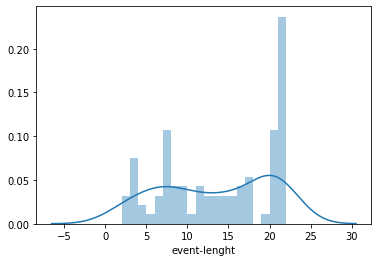

In [4]:
# Distribution of the event leghts of the events with high risk
sns.distplot(df_prueba["event-lenght"],bins=20)

In [5]:
ids_high_risk = np.array(df_prueba["event_id"])
ids_high_risk

array([  168.,   197.,   225.,   294.,   424.,   461.,   559.,  1408.,
        1414.,  1429.,  1545.,  1741.,  1855.,  1936.,  2115.,  2198.,
        2406.,  2548.,  2563.,  2942.,  2958.,  3439.,  3590.,  3615.,
        4104.,  4284.,  4351.,  4720.,  4942.,  5253.,  5343.,  5348.,
        5462.,  5773.,  5863.,  6341.,  6552.,  6578.,  6705.,  6723.,
        6792.,  6836.,  6980.,  7126.,  7427.,  7629.,  7678.,  7717.,
        7797.,  7888.,  7912.,  8449.,  8550.,  8561.,  8583.,  8591.,
        8661.,  8664.,  8758.,  8767.,  8776.,  8851.,  8887.,  8972.,
        9051.,  9383.,  9411.,  9556.,  9657.,  9851., 10184., 10510.,
       10778., 10787., 10849., 10982., 11033., 11072., 11146., 11180.,
       11530., 11597., 11692., 11795., 11851., 11876., 11953., 12175.,
       12226., 12726., 12766., 12769., 12992.])

In [6]:
df_high_risk = df.loc[df["event_id"].isin(ids_high_risk)]
df_high_risk

,event_id,time_to_tca,mission_id_1,mission_id_2,mission_id_3,mission_id_4,mission_id_5,risk,max_risk_estimate,max_risk_scaling,miss_distance,relative_speed,relative_position_r,relative_position_t,relative_position_n,relative_velocity_r,relative_velocity_t,relative_velocity_n,t_time_lastob_start,t_time_lastob_end,t_recommended_od_span,t_actual_od_span,t_obs_available,t_obs_used,t_residuals_accepted,t_weighted_rms,t_rcs_estimate,t_cd_area_over_mass,t_cr_area_over_mass,t_sedr,t_j2k_sma,t_j2k_ecc,t_j2k_inc,t_ct_r,t_cn_r,t_cn_t,t_crdot_r,t_crdot_t,t_crdot_n,t_ctdot_r,t_ctdot_t,t_ctdot_n,t_ctdot_rdot,t_cndot_r,t_cndot_t,t_cndot_n,t_cndot_rdot,t_cndot_tdot,c_time_lastob_start,c_time_lastob_end,c_recommended_od_span,c_actual_od_span,c_obs_available,c_obs_used,c_residuals_accepted,c_weighted_rms,c_cd_area_over_mass,c_cr_area_over_mass,c_sedr,c_j2k_sma,c_j2k_ecc,c_j2k_inc,c_ct_r,c_cn_r,c_cn_t,c_crdot_r,c_crdot_t,c_crdot_n,c_ctdot_r,c_ctdot_t,c_ctdot_n,c_ctdot_rdot,c_cndot_r,c_cndot_t,c_cndot_n,c_cndot_rdot,c_cndot_tdot,t_span,c_span,t_h_apo,t_h_per,c_h_apo,c_h_per,geocentric_latitude,azimuth,elevation,mahalanobis_distance,t_position_covariance_det,c_position_covariance_det,t_sigma_r,c_sigma_r,t_sigma_t,c_sigma_t,t_sigma_n,c_sigma_n,t_sigma_rdot,c_sigma_rdot,t_sigma_tdot,c_sigma_tdot,t_sigma_ndot,c_sigma_ndot,F10,F3M,SSN,AP,c_object_type_DEBRIS,c_object_type_PAYLOAD,c_object_type_ROCKET BODY,c_object_type_TBA,c_object_type_UNKNOWN
2122,168,6.756629,0,0,0,0,1,-5.015788,-5.007446,0.817600,5824.0,11029.0,-50.9,3940.9,-4288.0,77.0,-8116.4,-7467.5,1.0,0.0,3.65,3.65,512,506,99.4,1.080,3.4610,0.018468,0.011431,0.000020,7157.028634,0.000716,98.620518,0.066656,0.579201,0.058749,-0.061214,-0.999777,-0.053069,-0.999335,-0.102965,-0.579432,0.097538,0.198440,0.016519,-0.176517,-0.016124,-0.198472,180.0,2.0,17.81,17.81,21.0,21.0,98.8,2.236,0.862058,0.367120,0.000479,7227.732232,0.013893,71.046887,0.965280,0.128729,-0.054827,-0.964730,-0.999991,0.058574,-0.079415,0.183673,-0.704493,-0.185782,0.040275,-0.199956,0.842999,0.202719,-0.917987,12.00,2.0,784.014704,773.768564,950.012673,749.177792,69.617872,-42.615631,-0.400008,34.530214,9.164779e+05,1.790548e+15,7.397519,240.975102,123.685569,26220.816158,1.286767,35.780484,0.128575,27.161381,0.007711,0.067501,0.003058,0.323938,75.0,76.0,0.0,20.0,0,0,0,0,1
2123,168,6.486643,0,0,0,0,1,-4.985060,-4.971429,0.769027,3923.0,11029.0,-58.3,2656.6,-2886.8,78.3,-8116.4,-7467.5,1.0,0.0,3.71,3.71,499,493,99.4,1.095,3.4610,0.018089,0.011093,0.000019,7157.026653,0.000715,98.620511,0.198336,0.573199,0.171098,-0.192844,-0.999619,-0.164378,-0.999542,-0.227884,-0.574576,0.222426,0.190874,0.093640,-0.170088,-0.094004,-0.192527,180.0,2.0,17.81,17.81,21.0,21.0,98.8,2.236,0.862058,0.367120,0.000479,7227.737202,0.013893,71.046890,0.963847,0.130799,-0.056309,-0.963274,-0.999991,0.060135,-0.086685,0.181840,-0.704091,-0.183994,0.046325,-0.198856,0.842877,0.201680,-0.917831,12.00,2.0,784.010061,773.769246,950.018122,749.182282,69.628052,-42.615631,-0.406761,30.125522,4.522411e+05,1.715035e+15,6.813909,236.203472,94.960386,25676.608031,1.297385,35.730113,0.098549,26.597694,0.007126,0.067464,0.003095,0.323836,72.0,76.0,14.0,18.0,0,0,0,0,1
2124,168,6.126435,0,0,0,0,1,-4.997402,-4.986320,0.795719,4040.0,11029.0,-59.0,2735.9,-2972.3,78.2,-8116.4,-7467.5,1.0,0.0,3.63,3.63,524,518,99.4,1.071,3.4610,0.018313,0.011266,0.000020,7157.026699,0.000715,98.620518,-0.095385,0.525441,-0.018246,0.102105,-0.999573,0.024025,-0.999552,0.065567,-0.526048,-0.072308,0.211566,0.019427,-0.160883,-0.016665,-0.212683,180.0,2.0,17.81,17.81,21.0,21.0,98.8,2.236,0.862058,0.367120,0.000479,7227.736127,0.013893,71.046890,0.963929,0.130659,-0.056246,-0.963358,-0.999991,0.060066,-0.085347,0.182857,-0.704049,-0.185007,0.045961,-0.198941,0.842886,0.201760,-0.917876,12.00,2.0,784.009516,773.769881,950.016606,749.181648,69.627424,-42.615631,-0.406242,32.567753,4.200632e+05,1.720205e+15,6.762858,236.438153,89.170354,25717.443497,1.269861,35.733206,0.092992,26.640083,0.0070

In [7]:
#df_high_risk.to_csv("train_high_risk.csv", sep=",", index=False)

In [8]:
df_high_risk.groupby(["event_id"])["risk"].count().value_counts()

21    20
20    10
7     10
3      7
17     5
11     4
16     4
8      4
9      4
6      3
2      3
12     3
13     3
14     3
15     3
4      2
22     2
10     1
5      1
19     1
Name: risk, dtype: int64

### Get X and Y for the models

In [9]:
# Getting y (last row of each event_id)
y = df.groupby(["event_id"])["risk"].apply(lambda x: x.iloc[-1]).values.reshape(-1, 1)
print(y.shape)
y

(8892, 1)


array([[-30.        ],
       [-30.        ],
       [-27.65091683],
       ...,
       [-30.        ],
       [-30.        ],
       [ -7.1723723 ]])

In [10]:
# Getting X 
import sys
from impyute.imputation.cs import fast_knn
sys.setrecursionlimit(100000) #Increase the recursion limit of the OS

# Event Lenght column
df["event-length"] = df.groupby('event_id')['event_id'].transform('value_counts')

# Dropping rows with tca < 2 
X = df.loc[df["time_to_tca"]>2]

# Get last row
X = X.sort_values('time_to_tca',ascending=False).groupby('event_id').tail(1)
X = X.sort_values('event_id')

# Fill missing values
#X = X.dropna(axis=1, how='any')
columns = list(X.columns.values)
imputed_training = fast_knn(X.values, k=50)
X = pd.DataFrame(imputed_training, columns=columns)

# Set event_id as index
X.set_index("event_id", inplace=True)

X

,time_to_tca,mission_id_1,mission_id_2,mission_id_3,mission_id_4,mission_id_5,risk,max_risk_estimate,max_risk_scaling,miss_distance,relative_speed,relative_position_r,relative_position_t,relative_position_n,relative_velocity_r,relative_velocity_t,relative_velocity_n,t_time_lastob_start,t_time_lastob_end,t_recommended_od_span,t_actual_od_span,t_obs_available,t_obs_used,t_residuals_accepted,t_weighted_rms,t_rcs_estimate,t_cd_area_over_mass,t_cr_area_over_mass,t_sedr,t_j2k_sma,t_j2k_ecc,t_j2k_inc,t_ct_r,t_cn_r,t_cn_t,t_crdot_r,t_crdot_t,t_crdot_n,t_ctdot_r,t_ctdot_t,t_ctdot_n,t_ctdot_rdot,t_cndot_r,t_cndot_t,t_cndot_n,t_cndot_rdot,t_cndot_tdot,c_time_lastob_start,c_time_lastob_end,c_recommended_od_span,c_actual_od_span,c_obs_available,c_obs_used,c_residuals_accepted,c_weighted_rms,c_cd_area_over_mass,c_cr_area_over_mass,c_sedr,c_j2k_sma,c_j2k_ecc,c_j2k_inc,c_ct_r,c_cn_r,c_cn_t,c_crdot_r,c_crdot_t,c_crdot_n,c_ctdot_r,c_ctdot_t,c_ctdot_n,c_ctdot_rdot,c_cndot_r,c_cndot_t,c_cndot_n,c_cndot_rdot,c_cndot_tdot,t_span,c_span,t_h_apo,t_h_per,c_h_apo,c_h_per,geocentric_latitude,azimuth,elevation,mahalanobis_distance,t_position_covariance_det,c_position_covariance_det,t_sigma_r,c_sigma_r,t_sigma_t,c_sigma_t,t_sigma_n,c_sigma_n,t_sigma_rdot,c_sigma_rdot,t_sigma_tdot,c_sigma_tdot,t_sigma_ndot,c_sigma_ndot,F10,F3M,SSN,AP,c_object_type_DEBRIS,c_object_type_PAYLOAD,c_object_type_ROCKET BODY,c_object_type_TBA,c_object_type_UNKNOWN,event-length
event_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2.0,2.340627,0.0,0.0,0.0,0.0,1.0,-30.000000,-6.266241,401.442549,18763.0,14347.0,-692.9,-5175.6,18022.2,14.4,-13791.4,-3957.2,1.0,0.0,3.49,3.49,501.0,500.0,98.9,1.059,3.447900,0.019173,0.010743,0.000013,7158.408291,0.000863,98.523084,-0.051871,0.208553,0.036837,0.024967,-0.996103,-0.031476,-0.999694,0.027214,-0.209361,-0.000304,0.013260,-0.036926,-0.462864,0.040488,-0.012344,180.0,2.0,16.59,16.59,18.0,18.0,100.0,1.689,0.850363,0.474344,0.000693,7168.395618,0.001295,69.718480,-0.159121,0.540554,-0.046394,0.140791,-0.999716,0.036982,-0.999379,0.127943,-0.545108,-0.109516,0.722937,-0.057373,0.935105,0.041107,-0.727660,12.0,2.0,786.446298,774.096284,799.542232,780.975003,63.903222,-16.009902,-0.057504,227.820615,4.006767e+04,1.214045e+14,4.577326,51.249088,31.686243,2922.327839,1.414729,88.676852,0.033330,3.039035,0.004753,0.053199,0.003115,0.194275,69.0,77.0,11.0,6.0,0.0,0.0,0.0,0.0,1.0,20.0
3.0,2.278941,0.0,0.0,0.0,1.0,0.0,-30.000000,-7.320481,140.001151,23900.0,13574.0,26.3,10072.2,21674.9,-39.7,-12310.9,5718.9,1.0,0.0,7.56,7.56,240.0,238.0,99.9,1.118,0.426800,0.015909,0.008274,0.000019,7083.606025,0.002115,98.151372,-0.598082,0.268787,-0.163112,0.494094,-0.988589,0.131313,-0.999846,0.586150,-0.269134,-0.480662,0.187531,-0.137763,0.062188,0.108343,-0.187547,180.0,2.0,17.17,17.17,15.0,15.0,100.0,2.484,0.418293,0.141765,0.000487,7070.079861,0.004569,70.872300,-0.451050,0.830112,-0.026392,0.459875,-0.999906,0.037256,-0.966396,0.206731,-0.899499,-0.216368,0.711371,-0.005925,0.811578,0.010824,-0.778192,1.5,2.0,720.452161,690.485888,724.249394,659.636329,-69.883198,24.916732,0.167568,287.224245,7.401362e+06,3.423533e+13,8.516651,59.235817,101.164964,3764.712472,4.090482,73.758993,0.095417,3.976678,0.008990,0.056902,0.007782,0.160887,68.0,70.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,21.0
4.0,3.066467,0.0,0.0,0.0,1.0,0.0,-30.000000,-7.661743,434.669432,33593.0,12093.0,163.6,-19727.8,27190.5,25.8,-9788.5,-7101.8,1.0,0.0,7.03,7.03,294.0,294.0,99.8,1.358,2.907682,0.018361,0.025023,0.000029,7082.429604,0.003942,98.355121,-0.424212,-0.114650,0.114331,0.301243,-0.985749,-0.103448,-0.999842,0.409150,0.112968,-0.284874,0.182832,0.099536,0.298121,-0.112468,-0.185225,180.0,2.0,11.54,11.54,27.0,27.0,99.1,2.025,0.788613,0.441376,0.001403,7076.234143,0.004758,81.142435,-0.056333,0.647846,-0.090210,0.053671,-0.999848,0.094456,-0.999447,0.024978,-0.644887,-0.022288,0.567834,-0.076387,0.918143,0.077820,-0.565230,1.5,2.0,732.21

### Feature selection columns

In [11]:
columns=['time_to_tca', 'risk', 'c_time_lastob_end', 'c_time_lastob_start', 
         'max_risk_estimate', 'c_ctdot_r', 'c_obs_used', 'miss_distance',
         'c_obs_available','c_recommended_od_span','c_object_type_PAYLOAD', 
         'event-length', 'c_object_type_UNKNOWN','c_actual_od_span', 
         'c_cr_area_over_mass', 't_h_per', 'relative_velocity_t', 
         'relative_speed', 't_rcs_estimate',  'c_cd_area_over_mass', 
         'c_crdot_t', 'c_sigma_t', 'c_sigma_rdot', 'max_risk_scaling', 
         't_span']
X = pd.DataFrame(X, columns=columns)
X

,time_to_tca,risk,c_time_lastob_end,c_time_lastob_start,max_risk_estimate,c_ctdot_r,c_obs_used,miss_distance,c_obs_available,c_recommended_od_span,c_object_type_PAYLOAD,event-length,c_object_type_UNKNOWN,c_actual_od_span,c_cr_area_over_mass,t_h_per,relative_velocity_t,relative_speed,t_rcs_estimate,c_cd_area_over_mass,c_crdot_t,c_sigma_t,c_sigma_rdot,max_risk_scaling,t_span
event_id,,,,,,,,,,,,,,,,,,,,,,,,,
2.0,2.340627,-30.000000,2.0,180.0,-6.266241,-0.999379,18.0,18763.0,18.0,16.59,0.0,20.0,1.0,16.59,0.474344,774.096284,-13791.4,14347.0,3.447900,0.850363,-0.999716,2922.327839,3.039035,401.442549,12.0
3.0,2.278941,-30.000000,2.0,180.0,-7.320481,-0.966396,15.0,23900.0,15.0,17.17,0.0,21.0,0.0,17.17,0.141765,690.485888,-12310.9,13574.0,0.426800,0.418293,-0.999906,3764.712472,3.976678,140.001151,1.5
4.0,3.066467,-30.000000,2.0,180.0,-7.661743,-0.999447,27.0,33593.0,27.0,11.54,0.0,9.0,0.0,11.54,0.441376,676.371662,-9788.5,12093.0,2.907682,0.788613,-0.999848,1952.448463,2.058484,434.669432,1.5
5.0,2.103772,-13.100070,0.0,1.0,-4.878440,-0.999942,411.0,304.0,413.0,4.05,1.0,20.0,0.0,4.05,0.003343,612.210602,-268.6,2001.0,0.369000,0.017372,-0.989584,34.761214,0.037449,23.068536,1.0
6.0,2.040187,-30.000000,0.0,1.0,-5.079355,-0.997092,118.0,10864.0,120.0,12.07,0.0,21.0,0.0,12.07,0.182699,680.291434,-6638.6,10027.0,4.730800,0.350748,-0.999172,458.641254,0.483927,554.289715,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13147.0,2.120492,-8.498530,2.0,180.0,-6.113961,-0.988699,21.0,18980.0,21.0,8.26,0.0,21.0,0.0,8.26,0.513871,485.877506,-11604.8,13296.0,2.593000,0.185636,-0.999971,9442.438244,10.440283,8.648661,9.1
13148.0,2.014028,-30.000000,0.0,1.0,-5.223081,-0.932759,137.0,3914.0,137.0,6.36,1.0,21.0,0.0,6.36,0.000000,485.412338,-7008.2,10330.0,2.562000,0.049410,-0.999928,598.935138,0.661473,210.247272,9.1
13150.0,6.322295,-30.000000,0.0,1.0,-7.004628,-0.998431,100.0,3569.0,100.0,3.53,0.0,4.0,0.0,3.53,0.000000,602.201203,-14862.5,14952.0,13.362200,0.145193,-1.000000,18255.276712,19.781598,7361.969599,20.0


In [12]:
# Show distribution
def show_distrib(y_array, th):
    y_risk_class_ = np.where(y_array >= th, 1,0)
    sns.distplot(y_risk_class_)
    y_High_risk = np.sum(y_risk_class_==1)
    y_Low_risk = np.sum(y_risk_class_==0)
    y_risk_percent = 100*y_High_risk/(y_Low_risk+y_High_risk)
    print(f"High Risk: {y_High_risk}")
    print(f"Low Risk: {y_Low_risk}")
    print(f"Percent High Risk: {y_risk_percent}")

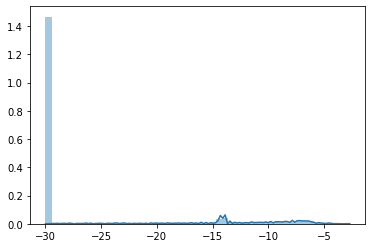

In [13]:
sns.distplot(y);

High Risk: 93
Low Risk: 8799
Percent High Risk: 1.0458839406207827


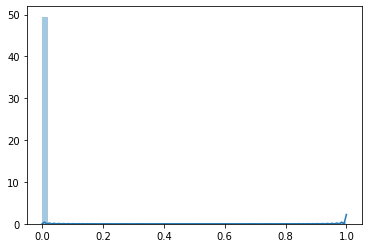

In [14]:
show_distrib(y, th=-6)

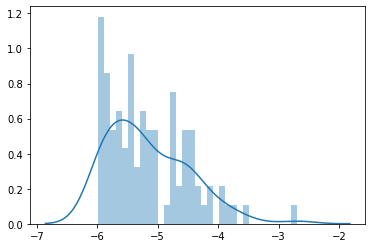

In [15]:
y_high_risk = y[np.where(y >= -6)]
sns.distplot(y_high_risk, bins=33);

### Get Train and Test data

In [16]:
# 1 -> high risk
# 0 -> low risk
y_risk_class = np.where(y >= -6, 1,0)
print(y_risk_class.shape)
y_risk_class

(8892, 1)


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [17]:
from sklearn.model_selection import train_test_split

X_t, X_test, y_t_real, y_test_real = train_test_split(X, y, test_size=0.15, 
                                                            random_state=42, 
                                                            shuffle=True,
                                                            stratify=y_risk_class)
print(X_t.shape)
print(y_t_real.shape)
print(X_test.shape)
print(y_test_real.shape)

(7558, 25)
(7558, 1)
(1334, 25)
(1334, 1)


In [18]:
y_t_class = np.where(y_t_real >= -6, 1,0)
X_train, X_val, y_train_real, y_val_real = train_test_split(X_t, y_t_real, 
                                                            test_size=0.17, 
                                                            random_state=24,  
                                                            shuffle=True,
                                                            stratify=y_t_class)
print(X_train.shape)
print(y_train_real.shape)
print(X_val.shape)
print(y_val_real.shape)

(6273, 25)
(6273, 1)
(1285, 25)
(1285, 1)


(6273, 1)
High Risk: 66
Low Risk: 6207
Percent High Risk: 1.052128168340507


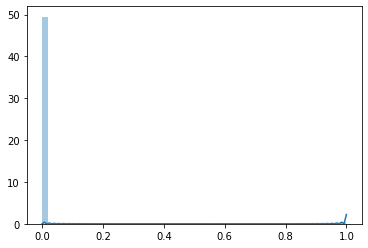

In [19]:
y_train = np.where(y_train_real >= -6, 1,0)
print(y_train.shape)
show_distrib(y_train, th=0.5)

(1285, 1)
High Risk: 13
Low Risk: 1272
Percent High Risk: 1.0116731517509727


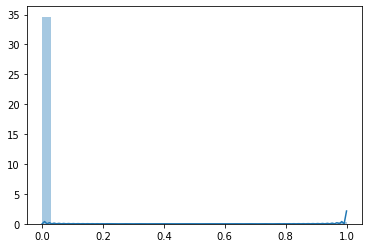

In [20]:
y_val = np.where(y_val_real >= -6, 1,0)
print(y_val.shape)
show_distrib(y_val, th=0.5)

(1334, 1)
High Risk: 14
Low Risk: 1320
Percent High Risk: 1.0494752623688155


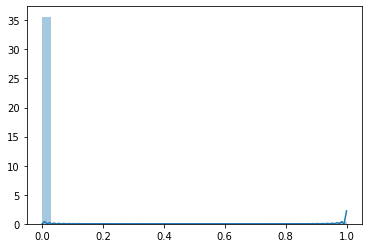

In [21]:
y_test = np.where(y_test_real >= -6, 1,0)
print(y_test.shape)
show_distrib(y_test, th=0.5)

In [22]:
X_test

,time_to_tca,risk,c_time_lastob_end,c_time_lastob_start,max_risk_estimate,c_ctdot_r,c_obs_used,miss_distance,c_obs_available,c_recommended_od_span,c_object_type_PAYLOAD,event-length,c_object_type_UNKNOWN,c_actual_od_span,c_cr_area_over_mass,t_h_per,relative_velocity_t,relative_speed,t_rcs_estimate,c_cd_area_over_mass,c_crdot_t,c_sigma_t,c_sigma_rdot,max_risk_scaling,t_span
event_id,,,,,,,,,,,,,,,,,,,,,,,,,
9006.0,2.087728,-14.731188,0.0,1.0,-5.837137,-0.999185,48.0,3444.0,48.0,7.62,0.0,20.0,0.0,7.62,0.231771,700.536177,-13873.5,14422.0,2.5119,1.063078,-0.999743,2107.405988,2.234876,24.684941,5.1
5517.0,2.031730,-30.000000,0.0,1.0,-6.908333,-0.999762,191.0,27445.0,315.0,6.50,1.0,21.0,0.0,3.03,0.023893,698.934083,-11658.4,13218.0,2.5119,0.035007,-0.999436,118.047279,0.121743,150063.479388,5.1
2810.0,2.081647,-9.265600,0.0,1.0,-5.919374,-0.999917,15.0,1231.0,15.0,15.87,0.0,20.0,0.0,15.87,0.059461,778.063760,-14789.6,14844.0,3.2960,0.367122,-0.995668,1822.306780,1.920055,11.129584,12.0
8046.0,2.340487,-23.480566,2.0,180.0,-6.420674,-0.999969,33.0,34220.0,33.0,17.00,0.0,16.0,1.0,17.00,0.199746,757.254664,-1814.2,5270.0,3.5050,0.558701,-0.997078,4364.970790,4.364210,44.073710,12.0
9653.0,2.137378,-30.000000,2.0,180.0,-6.559721,-0.999964,24.0,9089.0,24.0,17.84,0.0,21.0,1.0,17.84,0.016507,703.754746,-3573.3,7332.0,2.5119,0.030847,-0.983887,209.694959,0.223284,1307.586170,5.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10267.0,6.173913,-30.000000,0.0,1.0,-5.915066,-0.893238,327.0,60963.0,327.0,1.80,1.0,2.0,0.0,1.80,0.000000,415.003267,-2.6,198.0,2.3307,0.007767,-0.978436,7217.655436,1466.952935,204.635474,9.1
8310.0,2.096620,-9.773142,0.0,1.0,-4.972650,-0.999908,24.0,997.0,24.0,16.84,0.0,21.0,0.0,16.84,0.072411,773.592666,-14261.3,14590.0,3.4190,0.562808,-0.870886,694.133093,0.868756,14.749061,12.0
12761.0,2.296825,-21.255316,0.0,1.0,-6.907630,-0.999387,33.0,5820.0,33.0,17.89,0.0,20.0,0.0,17.89,0.173938,614.717751,-1059.5,4060.0,0.3920,0.411248,-0.996716,1101.710942,1.145997,37.671578,1.0


### Over Sampling

In [23]:
from imblearn.over_sampling import SMOTE, ADASYN, SVMSMOTE, KMeansSMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
sm = SMOTE(random_state=42, k_neighbors=58)
X_train, y_train = sm.fit_resample(X_train,y_train.reshape(-1,))
y_train = y_train.reshape(-1, 1)
print(X_train.shape)
print(y_train.shape)

Using TensorFlow backend.


(12414, 25)
(12414, 1)


High Risk: 6207
Low Risk: 6207
Percent High Risk: 50.0


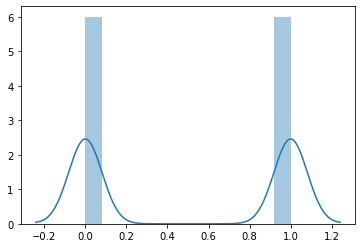

In [24]:
show_distrib(y_train, th=0.5)

High Risk: 14
Low Risk: 1320
Percent High Risk: 1.0494752623688155


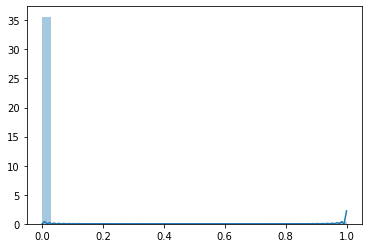

In [25]:
show_distrib(y_test, th=0.5)

### Scaling

In [26]:
# Scalers
X_train_scaler = MinMaxScaler()
X_val_scaler = MinMaxScaler()
X_t_scaler = MinMaxScaler()
X_test_scaler = MinMaxScaler()

In [27]:
X_t_scaled = X_t_scaler.fit_transform(X_t)
print(X_t_scaled.shape)
print(y_t_class.shape)

(7558, 25)
(7558, 1)


In [28]:
# Scaling X_train
X_train_scaled = X_train_scaler.fit_transform(X_train)
print(X_train_scaled.shape)
X_train_scaled

(12414, 25)


array([[4.60484029e-02, 7.95136645e-01, 5.00000000e-01, ...,
        1.85873743e-03, 2.47049305e-07, 1.81093807e-01],
       [6.38863844e-02, 6.79128244e-01, 1.00000000e+00, ...,
        2.37667831e-04, 5.91796539e-07, 3.25968852e-02],
       [1.65364375e-02, 0.00000000e+00, 5.00000000e-01, ...,
        4.08587508e-06, 1.32303702e-05, 5.07062658e-02],
       ...,
       [2.23425855e-02, 9.10098513e-01, 2.63812228e-01, ...,
        2.91841040e-05, 1.19439457e-07, 6.02992398e-01],
       [6.82263954e-02, 8.73431575e-01, 2.41269495e-01, ...,
        1.83960658e-04, 1.59756433e-07, 3.91507074e-01],
       [7.36754231e-02, 8.75903448e-01, 1.00000000e+00, ...,
        1.68768330e-04, 7.35697402e-08, 4.55661387e-01]])

In [29]:
# Scaling X_val
X_val_scaled = X_val_scaler.fit_transform(X_val)
print(X_val_scaled.shape)
X_val_scaled

(1285, 25)


array([[2.72120468e-01, 0.00000000e+00, 0.00000000e+00, ...,
        2.50468834e-03, 2.13578601e-05, 3.25968852e-01],
       [1.70205362e-03, 1.73335055e-01, 0.00000000e+00, ...,
        5.75947924e-05, 5.59620831e-06, 3.25968852e-02],
       [8.20719599e-01, 5.94576126e-01, 0.00000000e+00, ...,
        1.53425981e-02, 3.29910203e-06, 3.25968852e-01],
       ...,
       [3.90262042e-03, 8.59692580e-01, 0.00000000e+00, ...,
        8.23913754e-05, 1.05097820e-06, 3.25968852e-01],
       [8.91323311e-03, 0.00000000e+00, 0.00000000e+00, ...,
        1.10828490e-05, 9.24326755e-05, 4.31003260e-01],
       [5.39539957e-02, 0.00000000e+00, 0.00000000e+00, ...,
        4.57824786e-04, 1.19502379e-04, 3.25968852e-01]])

In [30]:
# Scaling X_test
X_test_scaled = X_test_scaler.fit_transform(X_test)
print(X_test_scaled.shape)
X_test_scaled

(1334, 25)


array([[1.84242933e-02, 5.77938075e-01, 0.00000000e+00, ...,
        2.78067187e-05, 3.79582393e-06, 1.81093807e-01],
       [6.65974588e-03, 0.00000000e+00, 0.00000000e+00, ...,
        1.07633865e-06, 2.30753858e-02, 1.81093807e-01],
       [1.71467039e-02, 7.84815423e-01, 0.00000000e+00, ...,
        2.38243483e-05, 1.71140531e-06, 4.31003260e-01],
       ...,
       [6.23530010e-02, 3.30994049e-01, 0.00000000e+00, ...,
        1.40327912e-05, 5.79278982e-06, 3.25968852e-02],
       [2.04496034e-02, 6.88541388e-01, 1.00000000e+00, ...,
        4.51903321e-04, 2.62308868e-06, 7.56972112e-01],
       [3.44651230e-02, 0.00000000e+00, 0.00000000e+00, ...,
        8.06681490e-06, 1.40505288e-05, 4.31003260e-01]])

### Neural Network model

In [31]:
import tensorflow as tf
from tensorflow.keras import Model, optimizers, losses, regularizers
from tensorflow.keras.layers import Input, Dense, Dropout
import tensorflow_addons as tfa

In [32]:
# Model
input_shape = X_train_scaled.shape[1]
inputs_1 = Input(shape=(input_shape))
x = Dense(25, activation='relu', kernel_regularizer=regularizers.l2(0.001))(inputs_1)
x = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x = Dense(96, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x = Dense(25, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
output_1 = Dense(1, activation = 'sigmoid')(x)

model_ffn = Model(inputs=inputs_1, outputs = output_1)
opt = tfa.optimizers.RectifiedAdam(lr=1e-3,total_steps=10000,warmup_proportion=0.1,min_lr=1e-5)

#opt = optimizers.Nadam(learning_rate=0.001)
#opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
loss_ = losses.binary_crossentropy

model_ffn.compile(optimizer=opt,loss = loss_, metrics =['accuracy','binary_accuracy'])
print(model_ffn.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 25)]              0         
_________________________________________________________________
dense (Dense)                (None, 25)                650       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1664      
_________________________________________________________________
dense_2 (Dense)              (None, 96)                6240      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                6208      
_________________________________________________________________
dense_4 (Dense)              (None, 25)                1625      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 26    

In [33]:
class_weights = {0: 2,
                1: 90}

In [34]:
# Train
batch_size = 64
epochs = 30
history = model_ffn.fit(X_train_scaled, y_train, shuffle=True, 
                      validation_data=(X_val_scaled, y_val),
                      batch_size=batch_size, epochs=epochs, 
                      class_weight=class_weights)

Train on 12414 samples, validate on 1285 samples
Epoch 1/30
12414/12414 [==============================] - 4s 283us/sample - loss: 29.7330 - accuracy: 0.4917 - binary_accuracy: 0.4917 - val_loss: 2.4170 - val_accuracy: 0.0101 - val_binary_accuracy: 0.0101
Epoch 2/30
12414/12414 [==============================] - 0s 38us/sample - loss: 10.1137 - accuracy: 0.5000 - binary_accuracy: 0.5000 - val_loss: 5.4687 - val_accuracy: 0.0101 - val_binary_accuracy: 0.0101
Epoch 3/30
12414/12414 [==============================] - 0s 37us/sample - loss: 2.6191 - accuracy: 0.6515 - binary_accuracy: 0.6515 - val_loss: 1.9522 - val_accuracy: 0.7704 - val_binary_accuracy: 0.7704
Epoch 4/30
12414/12414 [==============================] - 0s 37us/sample - loss: 1.4073 - accuracy: 0.8817 - binary_accuracy: 0.8817 - val_loss: 1.6736 - val_accuracy: 0.8280 - val_binary_accuracy: 0.8280
Epoch 5/30
12414/12414 [==============================] - 0s 40us/sample - loss: 1.1382 - accuracy: 0.9100 - binary_accuracy: 0.

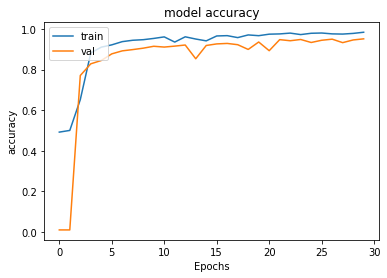

In [35]:
# Plot Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper left')
# Show figure
plt.show()

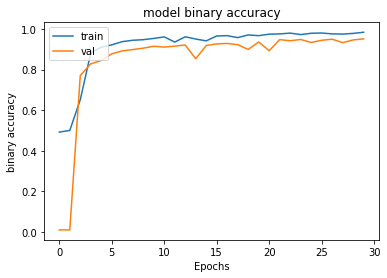

In [36]:
# Plot Binary Accuracy
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model binary accuracy')
plt.ylabel('binary accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper left')
# Show figure
plt.show()

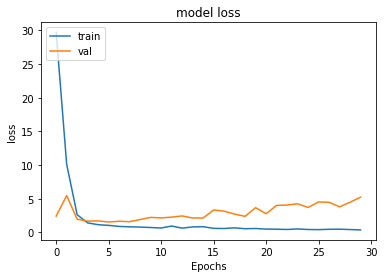

In [37]:
# Plot Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper left')
# Show figure
plt.show()

In [38]:
# Predict
predictions = model_ffn.predict(X_test_scaled)
predictions

array([[6.8157911e-05],
       [0.0000000e+00],
       [9.3368602e-01],
       ...,
       [0.0000000e+00],
       [3.4794284e-05],
       [0.0000000e+00]], dtype=float32)

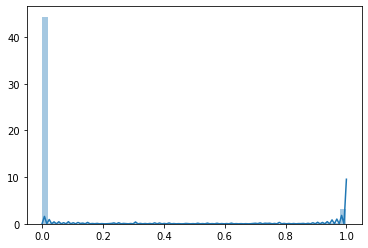

In [39]:
sns.distplot(predictions)
plt.show()

In [40]:
from sklearn.metrics import mean_squared_error, fbeta_score
'''
predicted = np.zeros(y_test.shape[0])
predicted.fill(-5)
predicted = predicted.reshape(-1, 1)
'''
def f_beta_score(predicted, real, verbose=False):
    #predicted = predictions_real
    #real = y_test_real

    real_binary = []
    predicted_binary = []

    for a in list(real):
        if (a >= -6):
            real_binary.append(1)
        else:
            real_binary.append(0)

    for a in list(predicted):
        if (a >= -6):
            predicted_binary.append(1)
        else:
            predicted_binary.append(0)

    fscore = fbeta_score(real_binary, predicted_binary, 2)
    real_mse = real[np.where(real >= -6)]
    predicted_mse = predicted[np.where(real >= -6)]
    mse = mean_squared_error(real_mse, predicted_mse)
    score = mse/fscore
    if verbose == True:
        print(f"F_score = {fscore}")
        print(f"MSE = {mse}")
        print(f"F_Beta Score (Beta=2): {score}")
    return score

In [41]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, f1_score, auc, roc_curve, balanced_accuracy_score
def plot_cm(y_pred,y):
    #y_pred = predictions_classif
    #y = y_test

    target_names = ['Low_Risk', 'High_Risk']
    print('Classification Report')
    print(classification_report(y, y_pred, target_names=target_names))
    print('f1 score (macro avg): %.3f' % f1_score(y, y_pred, average='macro'))
    print('Confusion matrix')
    cm = confusion_matrix(y, y_pred)
    print(cm)
    cmap = plt.cm.Blues
    plt.legend(target_names)
    hm = sns.heatmap(cm, annot=True, cmap=cmap, xticklabels=target_names, yticklabels=target_names)
    bottom, top = hm.get_ylim()
    hm.set_ylim(bottom + 0.5, top - 0.5)
    plt.xlabel("Predicted values")
    plt.ylabel("Actual values")
    plt.show()

In [42]:
# Find optimum threshold for F1 score
th_results = {}
thresholds = np.linspace(0.00001,0.99999,1000)
for th in thresholds:
    index = str(th)
    pred_classif = np.where(predictions >= th, 1, 0)
    th_results[index] = f1_score(pred_classif, y_test, average='macro')

In [43]:
score, threshold = max(zip(th_results.values(), th_results.keys()))
print(f"F_Score: {score} | Threshold: {threshold}")

F_Score: 0.6473564954682779 | Threshold: 0.99999


In [44]:
# Find optimum threshold for F beta score
th_results = {}
thresholds = np.linspace(0.00001,0.99999,1000)
for th in thresholds:
    index = str(th)
    predictions_real = np.where(predictions >= th, -5, -6.00001)
    th_results[index] = f_beta_score(predictions_real,y_test_real)

In [45]:
score, threshold = min(zip(th_results.values(), th_results.keys()))
print(f"F_beta_Score: {score} | Threshold: {threshold}")

F_beta_Score: 1.1734452226722798 | Threshold: 0.993984114114114


In [46]:
threshold = float(threshold)
#threshold = 0.5
print(threshold)

0.993984114114114


High Risk: 70
Low Risk: 1264
Percent High Risk: 5.247376311844078


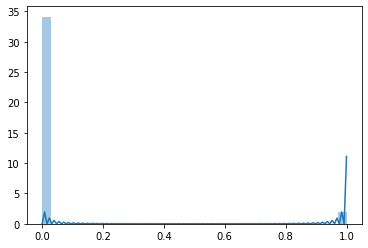

In [47]:
show_distrib(predictions, th=threshold)

In [48]:
predictions_real = np.where(predictions >= threshold, -5, -6.00001)
predictions_classif = np.where(predictions >= threshold, 1, 0)

Classification Report
              precision    recall  f1-score   support

    Low_Risk       1.00      0.95      0.98      1320
   High_Risk       0.14      0.71      0.24        14

    accuracy                           0.95      1334
   macro avg       0.57      0.83      0.61      1334
weighted avg       0.99      0.95      0.97      1334

f1 score (macro avg): 0.607
Confusion matrix
[[1260   60]
 [   4   10]]


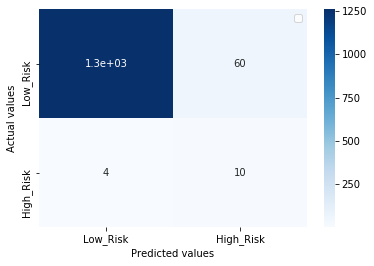

In [49]:
plot_cm(predictions_classif,y_test)

In [50]:
f_beta_score(predictions_real,y_test_real,verbose=True)

F_score = 0.3968253968253968
MSE = 0.4656528661397935
F_Beta Score (Beta=2): 1.1734452226722798


1.1734452226722798

In [51]:
# Baseline last value
baseline_last = np.asarray(X_test["risk"])
baseline_last = baseline_last.reshape(-1, 1)
baseline_last_class = np.where(baseline_last >= -6, 1, 0)
baseline_last_class = baseline_last_class.reshape(-1,1)

Classification Report
              precision    recall  f1-score   support

    Low_Risk       1.00      0.97      0.98      1320
   High_Risk       0.21      0.71      0.33        14

    accuracy                           0.97      1334
   macro avg       0.60      0.84      0.66      1334
weighted avg       0.99      0.97      0.98      1334

f1 score (macro avg): 0.656
Confusion matrix
[[1283   37]
 [   4   10]]


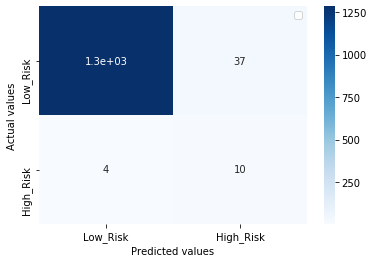

In [52]:
plot_cm(baseline_last_class,y_test)

In [53]:
f_beta_score(baseline_last,y_test_real,verbose=True)

F_score = 0.4854368932038835
MSE = 0.723547829009968
F_Beta Score (Beta=2): 1.4905085277605339


1.4905085277605339

In [54]:
# Baseline all -5
baseline_5 = np.zeros(predictions_real.shape[0])
baseline_5.fill(-5)
baseline_5 = baseline_5.reshape(-1,1)
baseline_5_class = np.zeros(predictions_real.shape[0])
baseline_5_class.fill(1)
baseline_5_class = baseline_5_class.reshape(-1,1)

Classification Report
              precision    recall  f1-score   support

    Low_Risk       0.00      0.00      0.00      1320
   High_Risk       0.01      1.00      0.02        14

    accuracy                           0.01      1334
   macro avg       0.01      0.50      0.01      1334
weighted avg       0.00      0.01      0.00      1334

f1 score (macro avg): 0.010
Confusion matrix
[[   0 1320]
 [   0   14]]


/home/jaime/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jaime/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


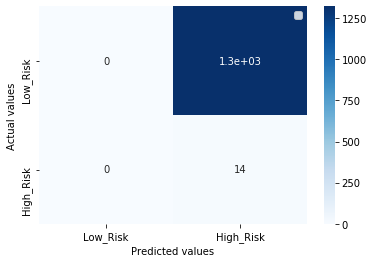

In [55]:
plot_cm(baseline_5_class,y_test)

In [56]:
f_beta_score(baseline_5,y_test_real,verbose=True)

F_score = 0.050359712230215826
MSE = 0.42620236128471783
F_Beta Score (Beta=2): 8.463161174082254


8.463161174082254

# Ensembling

In [57]:
#model_ffn.save("model_5.h5")

In [58]:
from tensorflow.keras.models import load_model

In [59]:
# load models from file
def load_all_models(n_models):
    all_models = list()
    for i in range(n_models):
        # define filename for this ensemble
        filename = 'model_' + str(i + 1) + '.h5'
        # load model from file
        model = load_model(filename)
        # add to list of members
        all_models.append(model)
        print('>loaded %s' % filename)
    return all_models

In [60]:
n_members = 5
members = load_all_models(n_members)
print('Loaded %d models' % len(members))

>loaded model_1.h5
>loaded model_2.h5
>loaded model_3.h5
>loaded model_4.h5
>loaded model_5.h5
Loaded 5 models


In [61]:
stackX = None
for model in members:
    # make prediction
    yhat = model.predict(X_t_scaled, verbose=0)
    # stack predictions into [rows, members, probabilities]
    if stackX is None:
        stackX = yhat
    else:
        stackX = np.append(stackX, yhat, axis=1)
stackX.shape

(7558, 5)

In [62]:
from sklearn import ensemble
class_weights = {0: 300,
                 1: 1}
model_stack = ensemble.RandomForestClassifier(random_state=42, 
                                             n_estimators=100, 
                                             class_weight=class_weights)
model_stack.fit(stackX, y_t_class)

/home/jaime/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestClassifier(bootstrap=True, class_weight={0: 300, 1: 1},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [63]:
stack_test = None
for model in members:
    # make prediction
    yhat = model.predict(X_test_scaled, verbose=0)
    # stack predictions into [rows, members, probabilities]
    if stack_test is None:
        stack_test = yhat
    else:
        stack_test = np.append(stack_test, yhat, axis=1)
stack_test.shape

(1334, 5)

High Risk: 54
Low Risk: 1280
Percent High Risk: 4.047976011994003


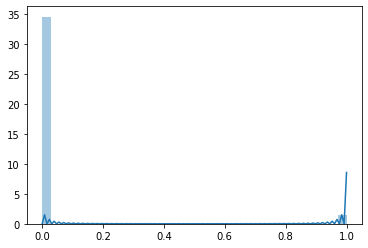

In [64]:
stack_pred = model_stack.predict(stack_test).reshape(-1,1)
show_distrib(stack_pred,th=0.5)

In [65]:
stack_pred_real = np.where(stack_pred >= 0.5, -5, -6.00001).reshape(-1,1)

In [66]:
stack_score = f_beta_score(stack_pred_real,y_test_real, verbose=True)

F_score = 0.36363636363636365
MSE = 0.5147878153761386
F_Beta Score (Beta=2): 1.4156664922843811


Classification Report
              precision    recall  f1-score   support

    Low_Risk       1.00      0.97      0.98      1320
   High_Risk       0.15      0.57      0.24        14

    accuracy                           0.96      1334
   macro avg       0.57      0.77      0.61      1334
weighted avg       0.99      0.96      0.97      1334

f1 score (macro avg): 0.608
Confusion matrix
[[1274   46]
 [   6    8]]


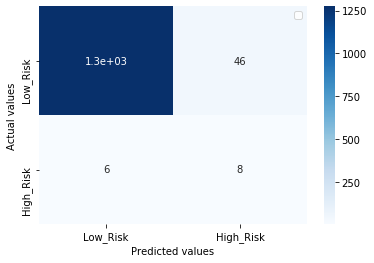

In [67]:
plot_cm(stack_pred,y_test)

## DeepStack Library

In [68]:
model_1 = load_model('model_1.h5')
model_2 = load_model('model_2.h5')
model_3 = load_model('model_3.h5')
model_4 = load_model('model_4.h5')
model_5 = load_model('model_5.h5')

In [69]:
from deepstack.base import KerasMember

member1 = KerasMember(name="model1", keras_model=model_1, train_batches=(X_t_scaled, y_t_class), val_batches=(X_val_scaled, y_val))
member2 = KerasMember(name="model2", keras_model=model_2, train_batches=(X_t_scaled, y_t_class), val_batches=(X_val_scaled, y_val))
member3 = KerasMember(name="model3", keras_model=model_3, train_batches=(X_t_scaled, y_t_class), val_batches=(X_val_scaled, y_val))
member4 = KerasMember(name="model4", keras_model=model_4, train_batches=(X_t_scaled, y_t_class), val_batches=(X_val_scaled, y_val))
member5 = KerasMember(name="model5", keras_model=model_5, train_batches=(X_t_scaled, y_t_class), val_batches=(X_val_scaled, y_val))

In [70]:
from deepstack.ensemble import StackEnsemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score

class_weights = {0: 300,
                 1: 1}
stack = StackEnsemble()

stack.model = RandomForestClassifier(verbose=0, n_estimators=200,random_state=42, n_jobs=20, min_samples_split=5,class_weight=class_weights)
stack.add_members([member1, member2, member3, member4, member5])
stack.fit()
stack.describe()

/home/jaime/miniconda3/envs/glsi/lib/python3.7/site-packages/deepstack/ensemble.py:224: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.model.fit(X, y, **kwargs)


Calling predict
model1 - roc_auc_score: 0.9454
model2 - roc_auc_score: 0.9227
model3 - roc_auc_score: 0.9425
model4 - roc_auc_score: 0.9294
model5 - roc_auc_score: 0.9246
StackEnsemble roc_auc_score: 0.6864


0.6864114658925979

In [71]:
stack_deep = stack.predict(X=stack_test).reshape(-1,1)
stack_deep.shape

Calling predict


(1334, 1)

High Risk: 44
Low Risk: 1290
Percent High Risk: 3.2983508245877062


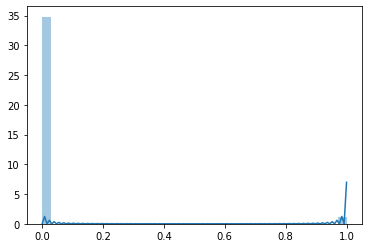

In [72]:
show_distrib(stack_deep,th=0.5)

F_score = 0.4000000000000001
MSE = 0.5147878153761386
F_Beta Score (Beta=2): 1.2869695384403463
Classification Report
              precision    recall  f1-score   support

    Low_Risk       1.00      0.97      0.98      1320
   High_Risk       0.18      0.57      0.28        14

    accuracy                           0.97      1334
   macro avg       0.59      0.77      0.63      1334
weighted avg       0.99      0.97      0.98      1334

f1 score (macro avg): 0.630
Confusion matrix
[[1284   36]
 [   6    8]]


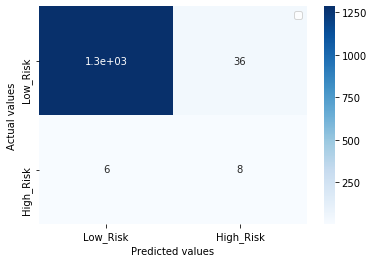

In [73]:
stack_deep_real = np.where(stack_deep >= 0.5, -5, -6.00001).reshape(-1,1)
f_beta_score(stack_deep_real,y_test_real, verbose=True)
plot_cm(stack_deep,y_test)

## Test only Random Forest

In [74]:
model_prueba = ensemble.RandomForestClassifier(random_state=42, 
                                             n_estimators=100, 
                                             class_weight=class_weights)
model_prueba.fit(X_t_scaled, y_t_class)

/home/jaime/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, class_weight={0: 300, 1: 1},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

High Risk: 54
Low Risk: 1280
Percent High Risk: 4.047976011994003


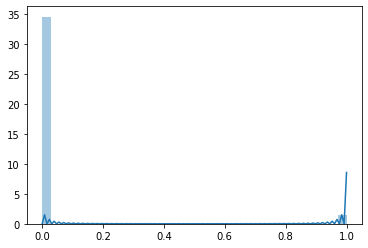

In [75]:
pred_prueba = model_prueba.predict(X_test_scaled).reshape(-1,1)
show_distrib(stack_pred,th=0.5)

In [76]:
pred_prueba_real = np.where(pred_prueba >= 0.5, -5, -6.00001).reshape(-1,1)

In [77]:
f_beta_score(pred_prueba_real,y_test_real, verbose=True)

F_score = 0.5288461538461539
MSE = 0.5150682529151379
F_Beta Score (Beta=2): 0.9739472418758971


0.9739472418758971

Classification Report
              precision    recall  f1-score   support

    Low_Risk       1.00      0.97      0.98      1320
   High_Risk       0.23      0.79      0.35        14

    accuracy                           0.97      1334
   macro avg       0.61      0.88      0.67      1334
weighted avg       0.99      0.97      0.98      1334

f1 score (macro avg): 0.670
Confusion matrix
[[1283   37]
 [   3   11]]


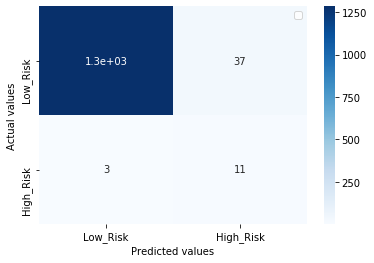

In [78]:
plot_cm(pred_prueba,y_test)

## Embeding ML model

In [79]:
from sklearn import linear_model, discriminant_analysis, kernel_ridge
from sklearn import svm, neighbors, gaussian_process, cross_decomposition
from sklearn import tree, ensemble, neural_network, naive_bayes
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
import xgboost
import catboost

kernel = DotProduct() + WhiteKernel()

class_weights = {0: 1,
                 1: 300}
class_weights_rf = {0: 300,
                 1: 1}

model_list = {"Logistic_Regression_Classifier": linear_model.LogisticRegression(solver='lbfgs',class_weight=class_weights),
              "Ridge_Classifier": linear_model.RidgeClassifier(class_weight=class_weights),
              "SGD_Classifier": linear_model.SGDClassifier(class_weight=class_weights),
              "Perceptron": linear_model.Perceptron(tol=1e-3, random_state=0,class_weight=class_weights),
              "Passive_Aggressive_Classifier": linear_model.PassiveAggressiveClassifier(random_state=42,class_weight=class_weights),         
              "SVM_Linear_Classifier": svm.LinearSVC(class_weight=class_weights),
              "SVM_C-support_Classifier": svm.SVC(gamma='scale',class_weight=class_weights),
              "AdaBoost_Classifier": ensemble.AdaBoostClassifier(),
              "Bagging_Classifier": ensemble.BaggingClassifier(),
              "Ensemble_Extra_Trees": ensemble.ExtraTreesClassifier(class_weight=class_weights_rf),
              "GradientBoost_Classifier": ensemble.GradientBoostingClassifier(),
              "Random_Forest_Classifier": ensemble.RandomForestClassifier(random_state=42, n_estimators=100,class_weight=class_weights_rf),
              "Decision_Tree_Classifier": tree.DecisionTreeClassifier(class_weight=class_weights_rf),
              "ExtraTree_Classifier": tree.ExtraTreeClassifier(class_weight=class_weights_rf),
              "XGBoost_Classifier": xgboost.XGBClassifier(),
              "CatBoost_Classifier": catboost.CatBoostClassifier(verbose=False)
             }

In [80]:
y_t_class_ = y_t_class.reshape(-1,)
stack_ml = None
for i in model_list:
    model_ml = model_list[i]
    model_ml.fit(X_t_scaled, y_t_class_)
    # make prediction
    yhat = model_ml.predict(X_t_scaled).reshape(-1,1)
    y_score = model_ml.predict(X_test_scaled).reshape(-1,1)
    y_score_real = np.where(y_score >= 0.5, -5, -6.00001).reshape(-1,1)
    print('\033[1m' + str(i) + '\033[0m')
    f_beta_score(y_score_real,y_test_real, verbose=True)
    # stack predictions into [rows, members, probabilities]
    if stack_ml is None:
        stack_ml = yhat
    else:
        stack_ml = np.append(stack_ml, yhat, axis=1)
    print(stack_ml.shape)

/home/jaime/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Logistic_Regression_Classifier
F_score = 0.17031630170316303
MSE = 0.42620236128471783
F_Beta Score (Beta=2): 2.5024167212574144
(7558, 1)
Ridge_Classifier
F_score = 0.13671875
MSE = 0.42620236128471783
F_Beta Score (Beta=2): 3.1173658425396504
(7558, 2)
SGD_Classifier
F_score = 0.10687022900763359
MSE = 0.42620236128471783
F_Beta Score (Beta=2): 3.988036380592717
(7558, 3)
Perceptron
F_score = 0.2892561983471075
MSE = 0.42620236128471783
F_Beta Score (Beta=2): 1.4734424490128815
(7558, 4)
Passive_Aggressive_Classifier
F_score = 0.15837104072398187
MSE = 0.42620236128471783
F_Beta Score (Beta=2): 2.691163481254933
(7558, 5)


/home/jaime/.local/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SVM_Linear_Classifier
F_score = 0.18469656992084432
MSE = 0.42620236128471783
F_Beta Score (Beta=2): 2.3075813560986864
(7558, 6)
SVM_C-support_Classifier
F_score = 0.26422764227642276
MSE = 0.5362345837239738
F_Beta Score (Beta=2): 2.029441655324578
(7558, 7)
AdaBoost_Classifier
F_score = 0.3125
MSE = 0.9381393499413312
F_Beta Score (Beta=2): 3.00204591981226
(7558, 8)
Bagging_Classifier
F_score = 0.1408450704225352
MSE = 0.9641931476172678
F_Beta Score (Beta=2): 6.845771348082603
(7558, 9)
Ensemble_Extra_Trees
F_score = 0.16393442622950818
MSE = 0.871845021360559
F_Beta Score (Beta=2): 5.3182546302994105
(7558, 10)


/home/jaime/.local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GradientBoost_Classifier
F_score = 0.2631578947368421
MSE = 1.1095994116325743
F_Beta Score (Beta=2): 4.216477764203782
(7558, 11)
Random_Forest_Classifier
F_score = 0.5288461538461539
MSE = 0.5150682529151379
F_Beta Score (Beta=2): 0.9739472418758971
(7558, 12)
Decision_Tree_Classifier
F_score = 0.10695187165775401
MSE = 0.759837848488189
F_Beta Score (Beta=2): 7.104483883364567
(7558, 13)
ExtraTree_Classifier
F_score = 0.11627906976744186
MSE = 0.8327080485047614
F_Beta Score (Beta=2): 7.161289217140949
(7558, 14)
XGBoost_Classifier
F_score = 0.16129032258064516
MSE = 0.8701780447099813
F_Beta Score (Beta=2): 5.395103877201884
(7558, 15)
CatBoost_Classifier
F_score = 0.410958904109589
MSE = 0.6255350486139667
F_Beta Score (Beta=2): 1.5221352849606524
(7558, 16)


In [81]:
class_weights = {0: 300,
                 1: 1}
model_ml_embeding = ensemble.RandomForestClassifier(random_state=42, 
                                             n_estimators=100, 
                                             class_weight=class_weights)
model_ml_embeding.fit(stack_ml, y_t_class_)

RandomForestClassifier(bootstrap=True, class_weight={0: 300, 1: 1},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [82]:
stack_ml_test = None
for i in model_list:
    model_ml = model_list[i]
    yhat = model_ml.predict(X_test_scaled).reshape(-1,1)
    # stack predictions into [rows, members, probabilities]
    if stack_ml_test is None:
        stack_ml_test = yhat
    else:
        stack_ml_test = np.append(stack_ml_test, yhat, axis=1)
stack_ml_test.shape

(1334, 16)

High Risk: 15
Low Risk: 1319
Percent High Risk: 1.1244377811094453


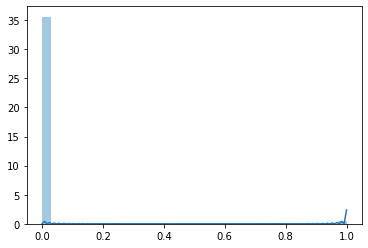

In [83]:
stack_ml_pred = model_ml_embeding.predict(stack_ml_test).reshape(-1,1)
show_distrib(stack_ml_pred,th=0.5)

In [84]:
stack_ml_pred_real = np.where(stack_ml_pred >= 0.5, -5, -6.00001).reshape(-1,1)

In [85]:
stack_ml_score = f_beta_score(stack_ml_pred_real,y_test_real, verbose=True)

F_score = 0.2816901408450704
MSE = 0.7878064669156981
F_Beta Score (Beta=2): 2.796712957550729


Classification Report
              precision    recall  f1-score   support

    Low_Risk       0.99      0.99      0.99      1320
   High_Risk       0.27      0.29      0.28        14

    accuracy                           0.98      1334
   macro avg       0.63      0.64      0.63      1334
weighted avg       0.98      0.98      0.98      1334

f1 score (macro avg): 0.634
Confusion matrix
[[1309   11]
 [  10    4]]


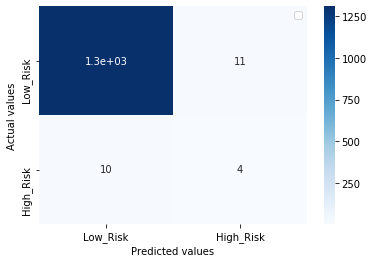

In [86]:
plot_cm(stack_ml_pred,y_test)

## Embeding ML model

In [87]:
from sklearn import linear_model, discriminant_analysis, kernel_ridge
from sklearn import svm, neighbors, gaussian_process, cross_decomposition
from sklearn import tree, ensemble, neural_network, naive_bayes
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
import xgboost
import catboost

kernel = DotProduct() + WhiteKernel()

class_weights = {0: 1,
                 1: 300}
class_weights_rf = {0: 300,
                 1: 1}

model_list = {"Perceptron": linear_model.Perceptron(tol=1e-3, random_state=0,class_weight=class_weights),
              "Random_Forest_Classifier": ensemble.RandomForestClassifier(random_state=42, n_estimators=100,class_weight=class_weights_rf),
              "CatBoost_Classifier": catboost.CatBoostClassifier(verbose=False)
             }

In [88]:
y_t_class_ = y_t_class.reshape(-1,)
stack_ml = None
for i in model_list:
    model_ml = model_list[i]
    model_ml.fit(X_t_scaled, y_t_class_)
    # make prediction
    yhat = model_ml.predict(X_t_scaled).reshape(-1,1)
    y_score = model_ml.predict(X_test_scaled).reshape(-1,1)
    y_score_real = np.where(y_score >= 0.5, -5, -6.00001).reshape(-1,1)
    print('\033[1m' + str(i) + '\033[0m')
    f_beta_score(y_score_real,y_test_real, verbose=True)
    # stack predictions into [rows, members, probabilities]
    if stack_ml is None:
        stack_ml = yhat
    else:
        stack_ml = np.append(stack_ml, yhat, axis=1)
    print(stack_ml.shape)

Perceptron
F_score = 0.2892561983471075
MSE = 0.42620236128471783
F_Beta Score (Beta=2): 1.4734424490128815
(7558, 1)
Random_Forest_Classifier
F_score = 0.5288461538461539
MSE = 0.5150682529151379
F_Beta Score (Beta=2): 0.9739472418758971
(7558, 2)
CatBoost_Classifier
F_score = 0.410958904109589
MSE = 0.6255350486139667
F_Beta Score (Beta=2): 1.5221352849606524
(7558, 3)


In [89]:
class_weights = {0: 300,
                 1: 1}
model_ml_embeding = ensemble.RandomForestClassifier(random_state=42, 
                                             n_estimators=100, 
                                             class_weight=class_weights)
model_ml_embeding.fit(stack_ml, y_t_class_)

RandomForestClassifier(bootstrap=True, class_weight={0: 300, 1: 1},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [90]:
stack_ml_test = None
for i in model_list:
    model_ml = model_list[i]
    yhat = model_ml.predict(X_test_scaled).reshape(-1,1)
    # stack predictions into [rows, members, probabilities]
    if stack_ml_test is None:
        stack_ml_test = yhat
    else:
        stack_ml_test = np.append(stack_ml_test, yhat, axis=1)
stack_ml_test.shape

(1334, 3)

High Risk: 48
Low Risk: 1286
Percent High Risk: 3.598200899550225


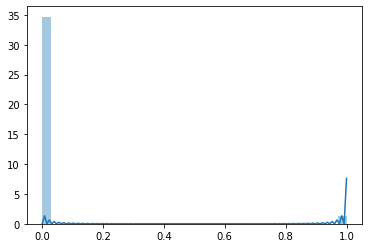

In [91]:
stack_ml_pred = model_ml_embeding.predict(stack_ml_test).reshape(-1,1)
show_distrib(stack_ml_pred,th=0.5)

In [92]:
stack_ml_pred_real = np.where(stack_ml_pred >= 0.5, -5, -6.00001).reshape(-1,1)

In [93]:
stack_ml_score = f_beta_score(stack_ml_pred_real,y_test_real, verbose=True)

F_score = 0.5288461538461539
MSE = 0.5150682529151379
F_Beta Score (Beta=2): 0.9739472418758971


Classification Report
              precision    recall  f1-score   support

    Low_Risk       1.00      0.97      0.98      1320
   High_Risk       0.23      0.79      0.35        14

    accuracy                           0.97      1334
   macro avg       0.61      0.88      0.67      1334
weighted avg       0.99      0.97      0.98      1334

f1 score (macro avg): 0.670
Confusion matrix
[[1283   37]
 [   3   11]]


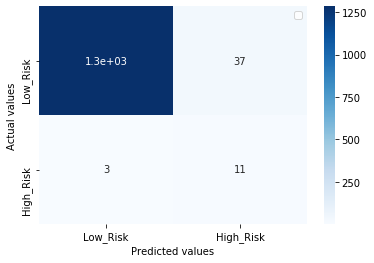

In [94]:
plot_cm(stack_ml_pred,y_test)